In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.integrate

# Use Gaussian process from scikit-learn
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process import kernels
from sklearn.preprocessing import StandardScaler

In [2]:
################################# 
######## Define the model ######
#################################

# Return observable given parameter
def charged_hadron_multiplicity(params):
    
    norm=params['norm']
    eta_over_s_eff=params['eta_over_s_eff']
    
    result=100*norm*(1+eta_over_s_eff)
    print(np.shape(result))
    return result

# Return observable given parameter
def charged_hadron_v2(params):
    
    norm=params['norm']
    eta_over_s_eff=params['eta_over_s_eff']
    
    result=0.04/(1+6*eta_over_s_eff)+0.0003*norm              #<=========================================================
    
    return result


# Dictionary of parameters
# "label" is used for plotting purposes
# "range" is the allowed range of the parameter (a simple uniform "prior")
# "truth" is the value of the parameters used for the closure test
parameter_d={
    'norm':{
        "label":"Normalization of energy deposition",
        "range":[6,12],                                     #<====================================================
        "truth":10.,                                         #<====================================================
        "nb_design_pts":10
    },
    'eta_over_s_eff':{
        "label":r"Effective $\eta/s$", 
        "range":[.01,.3],                                   #<====================================================
        "truth":0.12,                                        #<====================================================
        "nb_design_pts":14
    }
}

# Observable dictionary
obs_d={
    "multiplicity":{
        'fct':charged_hadron_multiplicity,
        'label':r'$dN_{ch}/d\eta$',
        'fake_exp_rel_uncert':0.05,                       #<====================================================
        'theoretical_relative_uncertainty':0.01           #<====================================================
    },
    "v2":{
        'fct':charged_hadron_v2,
        'label':r'$v_2\{2\}$',
        'fake_exp_rel_uncert':0.05,                       #<====================================================
        'theoretical_relative_uncertainty':0.01           #<====================================================
    },
    
}

In [3]:
#########################
#### Get the "data" #####
#########################

# Data dictionary
data_d={}

# This will be a "closure test": we use the model to generate "data"
# The Bayesian parameter estimation should be peaked around the true value of the parameters
for obs_name, info_d in obs_d.items():
    
    #
    obs_fct=info_d['fct']
    
    #
    data_d[obs_name]={}
    
    # Parameters
    param_value_list={item:tmp_d['truth'] for (item, tmp_d) in parameter_d.items() }
    print(param_value_list)
    
    tmp_value=obs_fct(param_value_list)
    data_d[obs_name]['mean']=tmp_value
    
    fake_exp_rel_uncert=info_d['fake_exp_rel_uncert']
        
    data_d[obs_name]['uncert']=fake_exp_rel_uncert*tmp_value

print(data_d)
#print(list(parameter_d.keys()))

{'norm': 10.0, 'eta_over_s_eff': 0.12}
()
{'norm': 10.0, 'eta_over_s_eff': 0.12}
{'multiplicity': {'mean': 1120.0, 'uncert': 56.0}, 'v2': {'mean': 0.02625581395348837, 'uncert': 0.0013127906976744185}}


(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


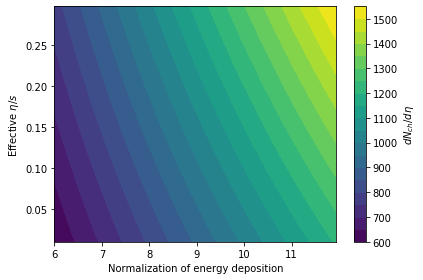

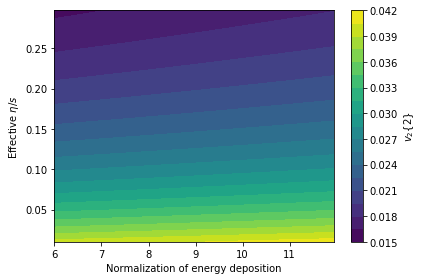

In [4]:
#########################
#### Plot the "data" #####
#########################

for obs_name, info_d in obs_d.items():

    # Function that returns the value of an observable
    obs_fct=info_d['fct']
    
    # Label for the observable
    obs_label=info_d['label']
    
    # Data
    tmp_data_d=data_d[obs_name]
    data_mean=tmp_data_d['mean']
    data_uncert=tmp_data_d['uncert']
    
    # Info about parameters
    param_name_list=list(parameter_d.keys())
    
    x_param_name=param_name_list[0]
    xmin, xmax = parameter_d[x_param_name]['range']
    x_label=parameter_d[x_param_name]['label']

    y_param_name=param_name_list[1]
    ymin, ymax = parameter_d[y_param_name]['range']
    y_label=parameter_d[y_param_name]['label']
    
    
    # Plot what the observable looks like over the parameter prior
    plt.figure()
    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Compute the posterior for a range of values of the parameter "x"
    x_range=np.arange(xmin, xmax, (xmax-xmin)/100.)
    y_range=np.arange(ymin, ymax, (ymax-ymin)/100.)

    x_mesh, y_mesh =  np.meshgrid(x_range, y_range, sparse=False, indexing='ij')

    z_list = [ obs_fct({x_param_name:x_val, y_param_name:y_val}) for (x_val,y_val) in zip(x_mesh,y_mesh) ]

    # Plot the posterior
    cs = plt.contourf(x_mesh, y_mesh, z_list, 20)

    cbar = plt.colorbar(cs,label=obs_label) 

    # Plot the "data"
    # plt.contour(x_mesh, y_mesh, z_list, levels=[data_mean],colors='r')
    # plt.contourf(x_mesh, y_mesh, z_list, levels=[data_mean-data_uncert,data_mean+data_uncert],colors='r',alpha=.4)

    plt.tight_layout()
    plt.show()

In [5]:
########################
# Get the calculations #
########################

calc_d={}

for obs_name, info_d in obs_d.items():

    # Function that returns the value of an observable
    obs_fct=info_d['fct']
        
    # Info about parameters
    param_name_list=list(parameter_d.keys())
        
    param1_name=param_name_list[0]
    param1_min, param1_max = parameter_d[param1_name]['range']
    param1_nb_design_pts=parameter_d[param1_name]["nb_design_pts"]

    param2_name=param_name_list[1]
    param2_min, param2_max = parameter_d[param2_name]['range']
    param2_nb_design_pts=parameter_d[param2_name]["nb_design_pts"]

    # For simplicity, we sample the emulator uniformly
    param1_design_list=np.linspace(param1_min,param1_max,num=param1_nb_design_pts)
    param2_design_list=np.linspace(param2_min,param2_max,num=param2_nb_design_pts)

    param1_mesh, param2_mesh =  np.meshgrid(param1_design_list, param2_design_list, sparse=False, 
                                            indexing='ij')
    
    calculation_mean_list = np.array([ obs_fct({param1_name:param1_val, param2_name:param2_val}) 
                                      for (param1_val, param2_val) in zip(param1_mesh, param2_mesh) ])
    
    relative_uncertainty=info_d['theoretical_relative_uncertainty']
    
    calculation_uncert_list=calculation_mean_list*relative_uncertainty #np.multiply(np.full_like(calculation_mean_list,np.mean(calculation_mean_list)),relative_uncertainty)
    
    calculation_mean_plus_noise=calculation_mean_list+[ np.random.normal(0,uncert) 
                                                       for uncert in calculation_uncert_list]
    
    calc_d[obs_name]={'param1_mesh':param1_mesh, 'param2_mesh':param2_mesh,
                      'param1_list':param1_design_list, 'param2_list':param2_design_list,
                      'mean':calculation_mean_list, 'mean_plus_noise':calculation_mean_plus_noise,
                      'uncert':calculation_uncert_list}

(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)
(14,)


[[6.00000000e+00 1.00000000e-02]
 [6.00000000e+00 3.23076923e-02]
 [6.00000000e+00 5.46153846e-02]
 [6.00000000e+00 7.69230769e-02]
 [6.00000000e+00 9.92307692e-02]
 [6.00000000e+00 1.21538462e-01]
 [6.00000000e+00 1.43846154e-01]
 [6.00000000e+00 1.66153846e-01]
 [6.00000000e+00 1.88461538e-01]
 [6.00000000e+00 2.10769231e-01]
 [6.00000000e+00 2.33076923e-01]
 [6.00000000e+00 2.55384615e-01]
 [6.00000000e+00 2.77692308e-01]
 [6.00000000e+00 3.00000000e-01]
 [6.66666667e+00 1.00000000e-02]
 [6.66666667e+00 3.23076923e-02]
 [6.66666667e+00 5.46153846e-02]
 [6.66666667e+00 7.69230769e-02]
 [6.66666667e+00 9.92307692e-02]
 [6.66666667e+00 1.21538462e-01]
 [6.66666667e+00 1.43846154e-01]
 [6.66666667e+00 1.66153846e-01]
 [6.66666667e+00 1.88461538e-01]
 [6.66666667e+00 2.10769231e-01]
 [6.66666667e+00 2.33076923e-01]
 [6.66666667e+00 2.55384615e-01]
 [6.66666667e+00 2.77692308e-01]
 [6.66666667e+00 3.00000000e-01]
 [7.33333333e+00 1.00000000e-02]
 [7.33333333e+00 3.23076923e-02]
 [7.333333

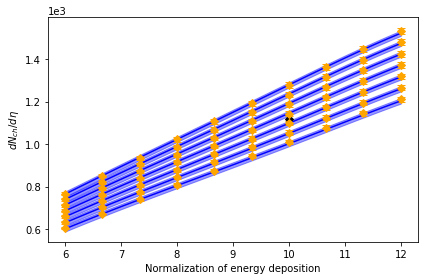

[[6.00000000e+00 1.00000000e-02]
 [6.00000000e+00 3.23076923e-02]
 [6.00000000e+00 5.46153846e-02]
 [6.00000000e+00 7.69230769e-02]
 [6.00000000e+00 9.92307692e-02]
 [6.00000000e+00 1.21538462e-01]
 [6.00000000e+00 1.43846154e-01]
 [6.00000000e+00 1.66153846e-01]
 [6.00000000e+00 1.88461538e-01]
 [6.00000000e+00 2.10769231e-01]
 [6.00000000e+00 2.33076923e-01]
 [6.00000000e+00 2.55384615e-01]
 [6.00000000e+00 2.77692308e-01]
 [6.00000000e+00 3.00000000e-01]
 [6.66666667e+00 1.00000000e-02]
 [6.66666667e+00 3.23076923e-02]
 [6.66666667e+00 5.46153846e-02]
 [6.66666667e+00 7.69230769e-02]
 [6.66666667e+00 9.92307692e-02]
 [6.66666667e+00 1.21538462e-01]
 [6.66666667e+00 1.43846154e-01]
 [6.66666667e+00 1.66153846e-01]
 [6.66666667e+00 1.88461538e-01]
 [6.66666667e+00 2.10769231e-01]
 [6.66666667e+00 2.33076923e-01]
 [6.66666667e+00 2.55384615e-01]
 [6.66666667e+00 2.77692308e-01]
 [6.66666667e+00 3.00000000e-01]
 [7.33333333e+00 1.00000000e-02]
 [7.33333333e+00 3.23076923e-02]
 [7.333333

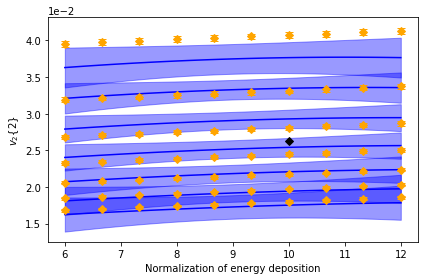

In [6]:
#####################################
# Make emulator for each observable #
#####################################

emul_d={}

for obs_name, info_d in obs_d.items():
    
    # Label for the observable
    obs_label=info_d['label']
    
    # Function that returns the value of an observable (just to get the truth)
    obs_fct=info_d['fct']
    
    param1_name=param_name_list[0]
    param1_min, param1_max = parameter_d[param1_name]['range']
    param1_label=parameter_d[param1_name]['label']
    param1_nb_design_pts=parameter_d[param1_name]["nb_design_pts"]
    param1_truth=parameter_d[param1_name]['truth']

    param2_name=param_name_list[1]
    param2_min, param2_max = parameter_d[param2_name]['range']
    param2_label=parameter_d[param2_name]['label']
    param2_nb_design_pts=parameter_d[param2_name]["nb_design_pts"]
    param2_truth=parameter_d[param2_name]['truth']
    
    param1_paramspace_length = param1_max-param1_min
    param2_paramspace_length = param2_max-param2_min

    # Kernels
    k0 = 1. * kernels.RBF(
        length_scale=(param1_paramspace_length/2.,param2_paramspace_length/2.),
        length_scale_bounds=(
            (param1_paramspace_length/param1_nb_design_pts, 3.*param1_paramspace_length),
            (param2_paramspace_length/param2_nb_design_pts, 3.*param2_paramspace_length)
            )
    )
    
    relative_uncertainty=info_d['theoretical_relative_uncertainty']
    k2 = 1. * kernels.WhiteKernel(
        noise_level=relative_uncertainty,
        #noise_level_bounds='fixed'
        noise_level_bounds=(relative_uncertainty/4.,4*relative_uncertainty)
    )

    kernel = (k0+k2)

    nrestarts=10

    emulator_design_pts_value=np.transpose([np.ravel(calc_d[obs_name]['param1_mesh']), np.ravel(calc_d[obs_name]['param2_mesh'])])
    #emulator_obs_mean_value=np.ravel(calc_d[obs_name]['mean'])
    emulator_obs_mean_value=np.ravel(calc_d[obs_name]['mean_plus_noise'])
    print(emulator_design_pts_value, np.shape(emulator_design_pts_value))
    print(emulator_obs_mean_value, np.shape(emulator_obs_mean_value))
    #emulator_y_input_transform=emulator_y_input
    
    #print(emulator_design_pts_value)
    #print(emulator_obs_mean_value)


    # Fit a GP (optimize the kernel hyperparameters) to each PC.
    gaussian_process=GPR(
        kernel=kernel,
        alpha=0.0001,
        n_restarts_optimizer=nrestarts,
        copy_X_train=True
        ).fit(emulator_design_pts_value,emulator_obs_mean_value)

    # https://github.com/keweiyao/JETSCAPE2020-TRENTO-BAYES/blob/master/trento-bayes.ipynb
    print('Information on emulator for observable '+obs_label)
    print('RBF: ', gaussian_process.kernel_.get_params()['k1'])
    print('White: ', gaussian_process.kernel_.get_params()['k2'])

    print(calc_d[obs_name]['param1_list'])
    emul_d[obs_name]={
        'gpr':gaussian_process
    #    'mean':scipy.interpolate.interp2d(calc_d[obs_name]['x_list'], calc_d[obs_name]['y_list'], np.transpose(calc_d[obs_name]['mean']), kind='linear', copy=True, bounds_error=False, fill_value=None),
    #    'uncert':scipy.interpolate.interp2d(calc_d[obs_name]['x_list'], calc_d[obs_name]['y_list'], np.transpose(calc_d[obs_name]['uncert']), kind='linear', copy=True, bounds_error=False, fill_value=None)
    }    
    
    #####################
    # Plot the emulator #
    #####################

    # observable vs value of one parameter (with the other parameter fixed)
    plt.figure()
    plt.xscale('linear')
    plt.yscale('linear')
    plt.xlabel(param1_label)
    plt.ylabel(obs_label)

    len_y=len(calc_d[obs_name]['param2_list'])
    step_y=np.max([int(len_y/5),1])
     
    for iy in np.arange(0,len_y,step_y):
        
        y=calc_d[obs_name]['param2_list'][iy]
        y_label=param2_label
        
        # Compute the posterior for a range of values of the parameter "x"
        x_range=np.linspace(param1_min,param1_max, 50)
        y_range=np.full_like(x_range,y)
        
        param_value_array=np.transpose([x_range,y_range])
        
        z_list,z_list_uncert = gaussian_process.predict(param_value_array, return_std=True)
        #print('param_value_array',param_value_array)
        #print('z_list',z_list)

        #print('all=',calc_d[obs_name]['mean'])
        #print('shape=',np.array(calc_d[obs_name]['mean']).shape)
        #print('w iy',np.array(calc_d[obs_name]['mean'])[:,iy])
        
        # Plot design points
        plt.errorbar(calc_d[obs_name]['param1_list'], np.array(calc_d[obs_name]['mean'])[:,iy], yerr=np.array(calc_d[obs_name]['uncert'])[:,iy], fmt='D', color='orange',capsize=4, label=y_label+"="+str(y))

        #print(calc_d[obs_name]['x_list'],calc_d[obs_name]['mean'][iy],calc_d[obs_name]['uncert'][iy])
        
        # Plot interpolator
        plt.plot(x_range, z_list, color='blue')
        plt.fill_between(x_range, z_list-z_list_uncert, z_list+z_list_uncert, color='blue',alpha=.4)

    # Plot the truth
    plt.plot(param1_truth, obs_fct({param1_name:param1_truth, param2_name:param2_truth}), "D", color='black')    
        
    plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))


    plt.tight_layout()
    plt.show()

In [7]:
#########################
# Compute the posterior #
#########################

# We assume uniform priors for this example
# Here 'x' is the only model parameter
def prior(params):
    
    return 1


# Under the approximations that we're using, the posterior is
# exp(-1/2*\sum_{observables, pT} (model(observable,pT)-data(observable,pT))^2/(model_err(observable,pT)^2+exp_err(observable,pT)^2)

# Here 'x' is the only model parameter
def likelihood(params, data):

    res=0.0

    norm=1.
    
    # Sum over observables
    for obs_name, info_d in obs_d.items():
        
        # Function that returns the value of an observable
        obs_fct=info_d['fct']
        
        emulator=emul_d[obs_name]['gpr']
        #emulator_uncert=emul_d[obs_name]['uncert']
        
        data_mean=data[obs_name]['mean']
        data_uncert=data[obs_name]['uncert']
        
        # Vectorize the emulators
        #emulator_calc_vec = np.vectorize(emulator_calc)
        #emulator_uncert_vec = np.vectorize(emulator_uncert)

        # Info about parameters
        param_name_list=list(parameter_d.keys())
        param1_name=param_name_list[0]
        param1_val=params[x_param_name]
    
        param2_name=param_name_list[1]
        param2_val=params[y_param_name]
        
        tmp_data_mean,tmp_data_uncert = data_mean, data_uncert
        
        tmp_model_mean,tmp_model_uncert = emulator.predict(np.atleast_2d(np.transpose([param1_val,param2_val])), return_std=True)

        cov=(tmp_model_uncert*tmp_model_uncert+tmp_data_uncert*tmp_data_uncert)

        res+=np.power(tmp_model_mean-tmp_data_mean,2)/cov
        
        norm*=1/np.sqrt(cov)

    res*=-0.5
    ret = norm*np.exp(res)
    print(ret)
    return norm*np.exp(res)


#
def posterior(params,data):
    
    return prior(params)*likelihood(params,data)

[4.51455724e-20 6.73989950e-20 1.01773765e-19 1.55399850e-19
 2.39849000e-19 3.74014538e-19 5.88901656e-19 9.35602318e-19
 1.49856586e-18 2.41764132e-18 3.92456807e-18 6.40309138e-18
 1.04873539e-17 1.72216137e-17 2.83169340e-17 4.65588717e-17
 7.64461938e-17 1.25176063e-16 2.04137218e-16 3.31129340e-16
 5.33591285e-16 8.53186626e-16 1.35214966e-15 2.12182016e-15
 3.29376603e-15 5.05377988e-15 7.65881134e-15 1.14565383e-14
 1.69067857e-14 2.46033902e-14 3.52944365e-14 4.98981475e-14
 6.95112129e-14 9.54061104e-14 1.29014148e-13 1.71891599e-13
 2.25667449e-13 2.91972882e-13 3.72354538e-13 4.68175620e-13
 5.80510800e-13 7.10042397e-13 8.56966144e-13 1.02091499e-12
 1.20090859e-12 1.39533455e-12 1.60196531e-12 1.81801169e-12
 2.04021133e-12 2.26494758e-12 2.48839164e-12 2.70665935e-12
 2.91597278e-12 3.11281677e-12 3.29408089e-12 3.45717913e-12
 3.60014115e-12 3.72167147e-12 3.82117531e-12 3.89875224e-12
 3.95516082e-12 3.99175928e-12 4.01042831e-12 4.01348277e-12
 4.00357936e-12 3.983626

[2.56478991e-10 3.50096668e-10 4.88899101e-10 6.99014037e-10
 1.02382426e-09 1.53658577e-09 2.36301580e-09 3.72218048e-09
 6.00121771e-09 9.89294935e-09 1.66507192e-08 2.85617736e-08
 4.98269014e-08 8.81906330e-08 1.57944554e-07 2.85408458e-07
 5.18803509e-07 9.45737800e-07 1.72353143e-06 3.13050445e-06
 5.65020090e-06 1.01050707e-05 1.78605355e-05 3.11229092e-05
 5.33525896e-05 8.98037546e-05 1.48179952e-04 2.39359499e-04
 3.78097034e-04 5.83554752e-04 8.79471489e-04 1.29375698e-03
 1.85731942e-03 2.60200840e-03 3.55768236e-03 4.74857447e-03
 6.18930403e-03 7.88102416e-03 9.80827330e-03 1.19370820e-02
 1.42147699e-02 1.65716652e-02 1.89247236e-02 2.11827586e-02
 2.32527703e-02 2.50467054e-02 2.64879289e-02 2.75167342e-02
 2.80943513e-02 2.82051134e-02 2.78566636e-02 2.70783077e-02
 2.59178048e-02 2.44370217e-02 2.27069478e-02 2.08025728e-02
 1.87980796e-02 1.67627146e-02 1.47575803e-02 1.28334728e-02
 1.10297676e-02 9.37426465e-03 7.88382821e-03 6.56562115e-03
 5.41871639e-03 4.435882

[3.16246881e-04 3.59005634e-04 4.15121786e-04 4.89232793e-04
 5.87897963e-04 7.20473837e-04 9.00411381e-04 1.14718153e-03
 1.48913279e-03 1.96772168e-03 2.64374386e-03 3.60643857e-03
 4.98663863e-03 6.97546909e-03 9.85039755e-03 1.40105829e-02
 2.00232488e-02 2.86819144e-02 4.10753703e-02 5.86629060e-02
 8.33462773e-02 1.17522457e-01 1.64094280e-01 2.26410547e-01
 3.08105692e-01 4.12814976e-01 5.43756631e-01 7.03198080e-01
 8.91856231e-01 1.10831535e+00 1.34857064e+00 1.60581132e+00
 1.87053739e+00 2.13105752e+00 2.37435089e+00 2.58720404e+00
 2.75747547e+00 2.87530736e+00 2.93410692e+00 2.93115752e+00
 2.86778290e+00 2.74906309e+00 2.58316926e+00 2.38043636e+00
 2.15231652e+00 1.91035421e+00 1.66529946e+00 1.42643727e+00
 1.20116832e+00 9.94837410e-01 8.10775532e-01 6.50503983e-01
 5.14041778e-01 4.00260752e-01 3.07241987e-01 2.32599716e-01
 1.73752027e-01 1.28129328e-01 9.33207147e-02 6.71646238e-02
 4.77936410e-02 3.36445741e-02 2.34444924e-02 1.61820238e-02
 1.10713071e-02 7.514013

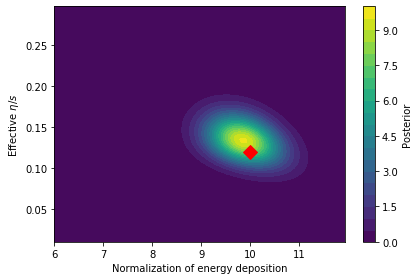

In [8]:
##################
# Plot posterior #
##################


# Info about parameters
param_name_list=list(parameter_d.keys())

param1_name=param_name_list[0]
param1_min, param1_max = parameter_d[param1_name]['range']
param1_label=parameter_d[param1_name]['label']
param1_truth=parameter_d[param1_name]['truth']

param2_name=param_name_list[1]
param2_min, param2_max = parameter_d[param2_name]['range']
param2_label=parameter_d[param2_name]['label']
param2_truth=parameter_d[param2_name]['truth']


plt.figure()
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel(param1_label)
plt.ylabel(param2_label)

# Compute the posterior for a range of values of the parameter "x"
param1_range=np.arange(param1_min, param1_max, (param1_max-param1_min)/100.)
param2_range=np.arange(param2_min, param2_max, (param2_max-param2_min)/100.)

param1_mesh, param2_mesh =  np.meshgrid(param1_range, param2_range, sparse=False, indexing='ij')

posterior_array = [ posterior({param1_name:param1_val, param2_name:param2_val},data_d) for (param1_val,param2_val) in zip(param1_mesh,param2_mesh) ]

# Plot the posterior
cs = plt.contourf(param1_mesh, param2_mesh, posterior_array, 20)

cbar = plt.colorbar(cs,label="Posterior") 

plt.plot([param1_truth], [param2_truth],"D",color='red',ms=10)

plt.tight_layout()
plt.show()

[2.48839164e-12]
[7.63247105e-20]
[1.33937205e-10]
[8.31462984e-19]
[3.37870334e-11]
[7.75707964e-17]
[6.81692554e-12]
[1.91666652e-14]
[3.82832544e-12]
[9.46115143e-13]
[3.7685513e-12]
[4.92019029e-20]
[1.80923561e-10]
[1.92148903e-19]
[7.47991992e-11]
[6.27568033e-18]
[1.42768735e-11]
[1.26970215e-15]
[4.34584354e-12]
[1.85797751e-13]
[3.9900587e-12]
[5.89254907e-11]
[1.44627202e-18]
[1.67187871e-09]
[1.59986323e-17]
[4.251339e-10]
[1.64526136e-15]
[9.21404134e-11]
[4.7065926e-13]
[6.41866321e-11]
[2.36673207e-11]
[8.15044122e-11]
[9.33199704e-19]
[2.25796062e-09]
[3.64832471e-18]
[9.35005125e-10]
[1.25078504e-16]
[1.83490547e-10]
[2.91309532e-14]
[6.43156898e-11]
[4.70983651e-12]
[7.65513168e-11]
[1.14338773e-09]
[2.30366999e-17]
[1.66943011e-08]
[2.56245421e-16]
[4.27942971e-09]
[2.88123545e-14]
[9.99550304e-10]
[9.52660569e-12]
[8.72718432e-10]
[4.86219631e-10]
[1.44105201e-09]
[1.49125468e-17]
[2.2542749e-08]
[5.79772403e-17]
[9.34919689e-09]
[2.06468669e-15]
[1.88807895e-09]
[5.

[0.00057065]
[6.49558593e-06]
[0.00042613]
[0.00542651]
[0.00492904]
[0.21548568]
[0.12111577]
[4.22646485e-09]
[0.0019433]
[1.19185466e-08]
[0.00098377]
[3.50549548e-07]
[0.00038343]
[0.00020511]
[0.00103159]
[0.06062816]
[0.02877293]
[0.00111887]
[4.77811587e-09]
[0.26244577]
[1.14249082e-08]
[0.26862309]
[7.85058911e-08]
[0.20350505]
[2.14670798e-06]
[0.0697458]
[0.00014697]
[0.00642222]
[4.10188044e-09]
[0.25726825]
[6.63464606e-09]
[0.26906291]
[2.55592609e-08]
[0.24945025]
[3.45291355e-07]
[0.13632035]
[1.71012692e-05]
[0.02553663]
[0.00210874]
[0.24814385]
[0.00176632]
[0.20217871]
[0.00100646]
[0.11066792]
[0.00048572]
[0.03273257]
[0.00037924]
[0.00546089]
[0.00091639]
[0.25487832]
[0.0019905]
[0.23174844]
[0.00139754]
[0.15971713]
[0.00069127]
[0.06548325]
[0.00038392]
[0.01405258]
[0.00050542]
[0.66647729]
[2.2553233e-08]
[0.00168055]
[1.58904783e-07]
[0.00068967]
[2.18341399e-05]
[0.00061582]
[0.01730825]
[0.00911675]
[0.61214566]
[0.28457885]
[1.67307627e-08]
[0.00208734]


[0.00020462]
[0.00016882]
[0.0461659]
[0.00173197]
[4.67027597]
[0.17964608]
[0.19476753]
[7.07089786e-06]
[6.36975365]
[1.32756561e-05]
[8.20974008]
[5.99086334e-05]
[9.14110088]
[0.00093867]
[5.14134714]
[0.03472906]
[0.83032858]
[6.36674673e-06]
[5.96062037]
[8.91413789e-06]
[7.16720186]
[2.45612908e-05]
[9.09107666]
[0.00020206]
[7.75925375]
[0.00550729]
[2.47763749]
[0.00492362]
[5.3861696]
[0.00017265]
[3.46859649]
[0.00014797]
[1.26291379]
[0.00014131]
[0.21497779]
[0.00025604]
[0.01844365]
[0.0014436]
[5.796488]
[0.00017929]
[4.57812744]
[0.00016101]
[2.27950781]
[0.00013897]
[0.57611981]
[0.00016839]
[0.06701239]
[0.00052522]
[0.00041724]
[6.63439471e-06]
[0.16908125]
[8.79638199e-06]
[0.09172131]
[1.57858392e-05]
[0.03017152]
[4.23545128e-05]
[0.00635157]
[0.00017744]
[0.00103486]
[6.3027093e-06]
[0.19026452]
[7.3925961e-06]
[0.13277051]
[1.12799511e-05]
[0.05590721]
[2.44516348e-05]
[0.01452418]
[8.22193774e-05]
[0.00260031]
[6.55672808]
[0.22387618]
[6.12481956]
[0.39064249

[0.0048187]
[0.01392379]
[0.00068181]
[0.2833463]
[0.00074164]
[0.23303738]
[0.0009368]
[0.1439863]
[0.00146791]
[0.06644233]
[0.0030307]
[0.02413471]
[1.15217974]
[0.3091743]
[0.2314834]
[0.41402917]
[0.31440451]
[0.63031316]
[0.49509481]
[0.93302028]
[0.78486257]
[1.1483388]
[1.07724573]
[0.29055796]
[0.21700388]
[0.34901345]
[0.2627014]
[0.50739986]
[0.39057615]
[0.7777162]
[0.62887591]
[1.06752291]
[0.94416085]
[0.06689945]
[0.0011505]
[2.12847237e-09]
[0.00246288]
[6.66956911e-09]
[0.02160419]
[1.05611535e-07]
[0.32108773]
[1.79007537e-05]
[0.30312701]
[0.00658767]
[0.00104428]
[1.74272237e-09]
[0.00147747]
[3.26216679e-09]
[0.00597328]
[2.02206359e-08]
[0.09499387]
[1.04910606e-06]
[0.51387899]
[0.00037793]
[0.18571487]
[0.00108324]
[0.0790846]
[0.00145474]
[0.14824766]
[0.00313798]
[0.32752012]
[0.01325879]
[0.51182229]
[0.0827589]
[0.33806897]
[0.00103524]
[0.06881854]
[0.00120281]
[0.10321473]
[0.00197956]
[0.22230899]
[0.005934]
[0.44296419]
[0.03301198]
[0.47398849]
[4.07047

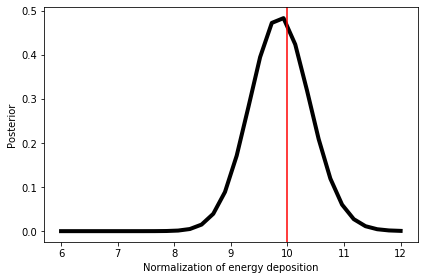

[1.11236627e-07]
[1.40161751e-19]
[0.00165238]
[1.21895134e-17]
[0.00163587]
[9.13318195e-15]
[0.00079536]
[1.05582188e-11]
[8.36257218e-05]
[6.42404859e-09]
[1.45792787e-06]
[5.45999475e-20]
[0.00159875]
[8.88251265e-19]
[0.00170559]
[2.86563268e-16]
[0.00131736]
[3.21334961e-13]
[0.00032428]
[2.91015491e-10]
[1.35794024e-05]
[1.84710894e-12]
[7.97756814e-20]
[8.7626213e-08]
[8.04966155e-19]
[3.16566378e-08]
[3.24118589e-17]
[5.09881136e-09]
[2.66635304e-15]
[3.72997049e-10]
[2.29234071e-13]
[1.28691777e-11]
[4.9652099e-20]
[1.06921836e-07]
[2.04549359e-19]
[5.84589783e-08]
[4.47868848e-18]
[1.40244857e-08]
[2.80844394e-16]
[1.52048565e-09]
[2.54849318e-14]
[7.58063929e-11]
[0.00017565]
[1.40912153e-07]
[0.00162218]
[3.69425769e-07]
[0.00170472]
[1.75561074e-06]
[0.00156272]
[1.1581866e-05]
[0.00098729]
[7.61913551e-05]
[0.00035996]
[1.157188e-07]
[0.00159251]
[2.08495657e-07]
[0.00166926]
[7.59588156e-07]
[0.00168419]
[4.41186209e-06]
[0.00132007]
[3.03752827e-05]
[0.0006416]
[1.4224

[8.95060999e-11]
[4.30233173e-18]
[2.10677405e-06]
[4.44220561e-17]
[8.41532213e-07]
[1.81966869e-15]
[1.59125098e-07]
[1.47250826e-13]
[1.4056686e-08]
[1.17852155e-11]
[5.79387688e-10]
[2.66220462e-18]
[2.51825421e-06]
[1.11473629e-17]
[1.46421536e-06]
[2.49918309e-16]
[4.01674552e-07]
[1.57290786e-14]
[5.20810304e-08]
[1.36847586e-12]
[3.13440232e-09]
[0.00129681]
[3.22350432e-06]
[0.00246056]
[7.593533e-06]
[0.00313633]
[2.97641206e-05]
[0.0039754]
[0.00014897]
[0.0037901]
[0.00068808]
[0.00214688]
[2.70297103e-06]
[0.00232389]
[4.57118213e-06]
[0.00273667]
[1.43295045e-05]
[0.00359324]
[6.58216851e-05]
[0.00409414]
[0.00033032]
[0.00307055]
[4.22174293e-06]
[1.23939422e-17]
[0.00288899]
[1.12730508e-15]
[0.00442915]
[8.35051575e-13]
[0.00437647]
[8.10550846e-10]
[0.00104848]
[3.26327282e-07]
[3.95457227e-05]
[4.76079249e-18]
[0.00255938]
[8.0368245e-17]
[0.00355882]
[2.67136167e-14]
[0.00495802]
[2.76544777e-11]
[0.00268591]
[1.87405123e-08]
[0.00025394]
[1.51316764e-10]
[6.9966321

[0.00029422]
[4.1684319e-15]
[0.00012727]
[1.95711514e-13]
[2.64248576e-05]
[1.86860275e-11]
[2.44801749e-06]
[1.75907099e-09]
[9.72590942e-08]
[2.25573551e-16]
[0.00034534]
[9.94829706e-16]
[0.00021162]
[2.49791085e-14]
[6.37955709e-05]
[1.83402405e-12]
[8.93702239e-06]
[1.88880003e-10]
[5.42029232e-07]
[0.0355687]
[0.0004304]
[0.00615418]
[0.00091028]
[0.01030909]
[0.00284198]
[0.0209202]
[0.00970261]
[0.03708854]
[0.02600911]
[0.04189584]
[0.00036791]
[0.00550588]
[0.0005858]
[0.0076363]
[0.00155978]
[0.0146176]
[0.00530071]
[0.0289539]
[0.01669847]
[0.04232004]
[0.0006372]
[1.09184648e-15]
[0.00779082]
[1.17996382e-13]
[0.02095077]
[1.14129287e-10]
[0.05391336]
[1.43758066e-07]
[0.041415]
[5.88641719e-05]
[0.00430051]
[4.04603271e-16]
[0.00617814]
[7.5986679e-15]
[0.01201503]
[3.17082255e-12]
[0.03632041]
[4.35662891e-09]
[0.05881849]
[3.52580847e-06]
[0.01742121]
[2.54067694e-08]
[6.03269463e-16]
[0.0005271]
[6.85283085e-15]
[0.00022977]
[3.27641371e-13]
[4.80561998e-05]
[3.202622

[1.09610022e-12]
[0.00539402]
[9.38684185e-11]
[0.00078155]
[1.16141793e-08]
[4.53418641e-05]
[0.61252836]
[0.03203905]
[0.01067855]
[0.06198128]
[0.02317096]
[0.15857359]
[0.07361336]
[0.38089738]
[0.23658105]
[0.60943775]
[0.51973894]
[0.02781197]
[0.00907717]
[0.04217558]
[0.01469514]
[0.09774199]
[0.04023696]
[0.25336535]
[0.13519951]
[0.51623078]
[0.37542643]
[0.31339535]
[0.02944341]
[0.61639702]
[0.04156492]
[0.62399994]
[0.07145199]
[0.60499807]
[0.13382207]
[0.52570125]
[0.24278927]
[0.38892334]
[0.02741706]
[0.61322589]
[0.03390175]
[0.62112418]
[0.05353561]
[0.62028956]
[0.09746165]
[0.57400959]
[0.18219749]
[0.4621638]
[0.18011095]
[0.60789231]
[0.00968976]
[0.58070415]
[0.01444655]
[0.50963108]
[0.02748392]
[0.38705787]
[0.05942119]
[0.24376159]
[0.12776846]
[0.61180958]
[0.00892995]
[0.59844557]
[0.01139851]
[0.5518154]
[0.0194623]
[0.45383518]
[0.04009526]
[0.31477839]
[0.08790186]
[0.04282981]
[3.91583429e-14]
[0.01326937]
[4.90922735e-12]
[0.05989245]
[6.08314471e-09]


[0.06412857]
[9.74005024e-10]
[0.00970933]
[1.30047753e-07]
[0.00056634]
[2.50245683]
[0.34454171]
[0.00951767]
[0.6256499]
[0.02457679]
[1.39788526]
[0.10542242]
[2.6625756]
[0.5032471]
[3.04333781]
[1.71343288]
[0.30246413]
[0.00781648]
[0.4427832]
[0.0140422]
[0.93180368]
[0.04889402]
[2.01547463]
[0.23381083]
[3.08771609]
[0.99293339]
[2.34609477]
[0.31878792]
[2.56446562]
[0.43696269]
[2.79733265]
[0.70947781]
[3.06607964]
[1.21560494]
[3.10326772]
[1.95248298]
[2.69613383]
[0.29849637]
[2.51291753]
[0.36286555]
[2.66347163]
[0.54900381]
[2.94209131]
[0.92950677]
[3.13190482]
[1.56331566]
[2.9575565]
[0.34452361]
[2.43851321]
[0.00845965]
[2.15599203]
[0.01375242]
[1.65187834]
[0.03036662]
[1.04135414]
[0.08010763]
[0.52500269]
[0.21683821]
[2.49194253]
[0.00766336]
[2.32759003]
[0.01030274]
[1.92739894]
[0.01981937]
[1.34777127]
[0.04867765]
[0.76027219]
[0.13262806]
[0.40065609]
[3.30827045e-13]
[0.01122385]
[4.39633788e-11]
[0.0713369]
[5.97890329e-08]
[0.79649342]
[0.00010854]

[0.20690371]
[1.09410415e-05]
[2.8672692]
[0.0110446]
[7.72707626]
[6.95036529e-05]
[6.96528813e-13]
[1.09300453]
[8.81936649e-12]
[0.55294162]
[5.05193737e-10]
[0.13750782]
[6.21901012e-08]
[0.01392372]
[7.63114317e-06]
[0.00051713]
[4.13452586e-13]
[1.23758584]
[1.96041887e-12]
[0.8411322]
[5.78781299e-11]
[0.30477688]
[5.34951119e-09]
[0.04947269]
[7.19576471e-07]
[0.00304157]
[4.53730977]
[1.46273968]
[0.00474271]
[2.49423059]
[0.01421341]
[4.91118785]
[0.07877638]
[7.62217951]
[0.52615458]
[6.53722661]
[2.59303253]
[1.29908298]
[0.00378175]
[1.83468092]
[0.00742729]
[3.5182648]
[0.03176029]
[6.45955289]
[0.20510753]
[7.73141754]
[1.24792578]
[7.12854003]
[1.36290496]
[4.72156071]
[1.81301417]
[5.48509971]
[2.78398675]
[6.66886553]
[4.38913996]
[7.68363012]
[6.31819981]
[7.6628354]
[1.28350449]
[4.56794237]
[1.53315703]
[5.03051248]
[2.22259063]
[6.05048811]
[3.51092003]
[7.25205964]
[5.35996652]
[7.84626321]
[0.3292195]
[4.35374054]
[0.00414149]
[3.60634059]
[0.00725045]
[2.464439

[7.80680148]
[9.06134075]
[0.15859875]
[3.56693972]
[0.00113326]
[2.79445839]
[0.00211206]
[1.73226462]
[0.00590003]
[0.81675038]
[0.02129541]
[0.29094939]
[0.08275621]
[3.73310647]
[0.00099907]
[3.24413868]
[0.00145789]
[2.27108766]
[0.00338571]
[1.23309017]
[0.01097238]
[0.50390945]
[0.042086]
[2.37099652]
[4.80120127e-12]
[0.00136593]
[6.14259975e-10]
[0.01486454]
[7.69332362e-07]
[0.41142591]
[0.00119051]
[5.54584151]
[0.36849608]
[6.91332938]
[1.71720583e-12]
[0.00082255]
[3.5814e-11]
[0.00368338]
[1.86601028e-08]
[0.0764406]
[3.33742233e-05]
[1.85437242]
[0.02807517]
[8.99729669]
[0.00020431]
[2.59718199e-12]
[2.07834578]
[3.21792392e-11]
[1.12388096]
[1.77104781e-09]
[0.30930056]
[2.05767302e-07]
[0.03507107]
[2.34320687e-05]
[0.00144913]
[1.548072e-12]
[2.3205533]
[7.24772274e-12]
[1.64394538]
[2.07469357e-10]
[0.64982931]
[1.82587349e-08]
[0.11773897]
[2.29834685e-06]
[0.00809359]
[3.4074819]
[2.68847749]
[0.00100868]
[4.25200022]
[0.00349398]
[7.25973478]
[0.02485465]
[9.0653

[0.00026499]
[4.99020697e-12]
[1.65972122]
[5.93703234e-11]
[0.95536767]
[3.04158722e-09]
[0.29077469]
[3.20237129e-07]
[0.03731156]
[3.24004035e-05]
[0.00175987]
[2.99819625e-12]
[1.82954418]
[1.37025103e-11]
[1.34664368]
[3.70654985e-10]
[0.57872137]
[2.99398916e-08]
[0.11751924]
[3.37817328e-06]
[0.00919703]
[1.29051055]
[2.08154407]
[0.00015213]
[3.07961842]
[0.00058466]
[4.65856309]
[0.00498019]
[4.88100534]
[0.05856872]
[2.49772176]
[0.54069944]
[1.89981836]
[0.00011549]
[2.4686897]
[0.00026316]
[3.8674263]
[0.00158713]
[5.11777088]
[0.01698265]
[3.878381]
[0.1896822]
[5.1025243]
[1.97157979]
[1.37898303]
[2.44704887]
[1.7869325]
[3.32118153]
[2.60460407]
[4.3995708]
[3.77748443]
[5.09942372]
[4.84203689]
[1.88212269]
[1.3049774]
[2.15749375]
[1.53556403]
[2.83876499]
[2.14191523]
[3.86241136]
[3.16363707]
[4.84311594]
[4.36969042]
[0.03148564]
[1.20576982]
[0.00012898]
[0.89269892]
[0.00025551]
[0.50150414]
[0.00079309]
[0.20682678]
[0.0032966]
[0.06285254]
[0.01508828]
[1.27614

[0.04945188]
[0.00058157]
[0.01361484]
[0.00294323]
[0.36843706]
[1.63165816e-05]
[0.30296977]
[2.52469903e-05]
[0.18666811]
[6.71236003e-05]
[0.08376771]
[0.00026581]
[0.0269204]
[0.00130772]
[0.80495823]
[1.22187379e-11]
[2.10294745e-05]
[1.27753217e-09]
[0.00033768]
[1.11720344e-06]
[0.0182346]
[0.0010535]
[0.56368198]
[0.1771511]
[1.60868219]
[4.5447494e-12]
[1.17378629e-05]
[8.41308639e-11]
[6.62115604e-05]
[3.30319574e-08]
[0.00235566]
[3.84223436e-05]
[0.1232177]
[0.01856604]
[1.39638004]
[0.00020719]
[6.76716344e-12]
[0.72822845]
[7.59246547e-11]
[0.44814901]
[3.51028947e-09]
[0.1525619]
[3.21521555e-07]
[0.02264853]
[2.76165578e-05]
[0.00126181]
[4.11306758e-12]
[0.79199461]
[1.81517521e-11]
[0.60701809]
[4.52593314e-10]
[0.28569985]
[3.23565159e-08]
[0.066091]
[3.13171361e-06]
[0.00605701]
[0.27924994]
[0.88418145]
[1.48364234e-05]
[1.22152532]
[6.22771771e-05]
[1.63864915]
[0.00061889]
[1.4530135]
[0.00893968]
[0.60530892]
[0.10408378]
[0.81799119]
[1.10694932e-05]
[1.020307

[0.30564863]
[0.09706827]
[0.3457658]
[0.16701134]
[0.33309249]
[0.25964734]
[0.21181367]
[0.03881588]
[0.2329182]
[0.04788444]
[0.27870611]
[0.07431058]
[0.32988647]
[0.12791444]
[0.34786908]
[0.21242059]
[0.00043989]
[0.03508275]
[8.55904991e-07]
[0.02399217]
[1.83731931e-06]
[0.01175157]
[6.55838644e-06]
[0.00402872]
[3.29221675e-05]
[0.00098505]
[0.00018784]
[0.03772045]
[7.33738907e-07]
[0.0302175]
[1.16516012e-06]
[0.01753208]
[3.29003887e-06]
[0.00719831]
[1.42545882e-05]
[0.00207002]
[7.84877646e-05]
[0.16158109]
[1.25986847e-11]
[9.30095555e-07]
[1.0983788e-09]
[1.77767114e-05]
[6.96244084e-07]
[0.00130108]
[0.00042703]
[0.05928018]
[0.04478657]
[0.25850758]
[4.85480501e-12]
[5.0199159e-07]
[8.07069224e-11]
[3.13768838e-06]
[2.45727869e-08]
[0.00014238]
[1.95085062e-05]
[0.01060064]
[0.0059459]
[0.18096417]
[9.42627341e-05]
[7.12753583e-12]
[0.14910493]
[7.31228865e-11]
[0.09974332]
[2.89024195e-09]
[0.03927648]
[2.13902631e-07]
[0.00712101]
[1.43123114e-05]
[0.00050462]
[4.40

[0.0316165]
[3.36916748e-10]
[0.01827243]
[1.70571957e-08]
[0.00578658]
[1.06777391e-06]
[0.00079808]
[0.00379752]
[0.0405207]
[5.70442624e-08]
[0.04857767]
[2.74746333e-07]
[0.05150758]
[3.4793191e-06]
[0.03371787]
[6.95801862e-05]
[0.00990748]
[0.0011723]
[0.03858105]
[4.1433743e-08]
[0.04415002]
[1.07955214e-07]
[0.05190078]
[8.91773715e-07]
[0.04529301]
[1.52657612e-05]
[0.02047615]
[0.00030312]
[0.04005199]
[0.03936587]
[0.00416658]
[0.04396444]
[0.00602524]
[0.04989605]
[0.01056801]
[0.05223204]
[0.01951707]
[0.04614849]
[0.03294865]
[0.03838365]
[0.00385704]
[0.04128544]
[0.00484939]
[0.04701801]
[0.00785743]
[0.05188914]
[0.01440169]
[0.05035645]
[0.02584019]
[3.24098234e-05]
[0.0034554]
[4.70981354e-08]
[0.00228929]
[1.04302195e-07]
[0.00106184]
[3.93175746e-07]
[0.00033837]
[2.12533012e-06]
[7.59354346e-05]
[1.32247725e-05]
[0.00373875]
[4.01286192e-08]
[0.00293857]
[6.49180424e-08]
[0.00163212]
[1.91414221e-07]
[0.00062834]
[8.84927353e-07]
[0.00016675]
[5.28582528e-06]
[0.0

[5.93086261e-11]
[0.00269235]
[1.64508284e-09]
[0.00145847]
[7.44414569e-08]
[0.00041831]
[2.76251912e-06]
[5.24216762e-05]
[4.53939589e-12]
[0.0034919]
[1.68709424e-11]
[0.0031201]
[2.81126194e-10]
[0.00211153]
[1.0890915e-08]
[0.00085843]
[4.82084943e-07]
[0.00016535]
[0.00015441]
[0.00363439]
[1.10539886e-09]
[0.00393032]
[5.76638839e-09]
[0.0035375]
[8.41601274e-08]
[0.00189829]
[2.0375008e-06]
[0.0004499]
[4.26490171e-05]
[0.00353481]
[7.90568171e-10]
[0.00379667]
[2.15921349e-09]
[0.00389144]
[1.99493457e-08]
[0.00282478]
[4.04309655e-07]
[0.00103666]
[9.87705764e-06]
[0.00269451]
[1.22880981e-11]
[1.02135504e-09]
[6.91457627e-10]
[2.61533651e-08]
[1.97121526e-07]
[3.19972209e-06]
[4.00948769e-05]
[0.00028204]
[0.00127693]
[0.00269239]
[5.15110565e-12]
[5.2130848e-10]
[6.62265513e-11]
[3.86717649e-09]
[1.08391457e-08]
[2.64537181e-07]
[3.27476634e-06]
[3.5770331e-05]
[0.000305]
[0.00124815]
[1.19257567e-05]
[7.31298006e-12]
[0.00259898]
[6.05754136e-11]
[0.00210295]
[1.63705377e-

[4.75692652e-07]
[7.65936732e-05]
[8.19797012e-06]
[0.00064006]
[1.84602982e-11]
[0.00060277]
[1.08260304e-10]
[0.00043021]
[1.9545959e-09]
[0.00017074]
[6.36243734e-08]
[2.86369032e-05]
[1.88738982e-06]
[0.00064011]
[1.2908847e-11]
[0.00063234]
[3.77645219e-11]
[0.00053687]
[4.11806284e-10]
[0.00029757]
[1.0791263e-08]
[7.87441726e-05]
[3.65647045e-07]
[0.00059539]
[2.76257022e-11]
[1.88067174e-11]
[1.26416804e-09]
[6.21326036e-10]
[2.43665381e-07]
[1.21777005e-07]
[2.74887154e-05]
[2.03474453e-05]
[0.00041726]
[0.00040419]
[1.20460422e-11]
[9.15347309e-12]
[1.37282308e-10]
[7.86497392e-11]
[1.66944594e-08]
[7.75597835e-09]
[3.08843103e-06]
[1.84438955e-06]
[0.00014616]
[0.00012884]
[9.65613585e-06]
[1.68353181e-11]
[0.00059421]
[1.26130528e-10]
[0.00055457]
[2.8454695e-09]
[0.00039406]
[9.58561469e-08]
[0.00016228]
[2.45579294e-06]
[3.07555065e-05]
[1.10749715e-11]
[0.00059543]
[3.84521067e-11]
[0.00058478]
[5.45277878e-10]
[0.00049175]
[1.64277895e-08]
[0.00027533]
[5.19904679e-07]


[4.22845748e-08]
[0.00091364]
[1.75278014e-10]
[7.29927219e-13]
[7.47045357e-09]
[3.494679e-11]
[1.25027141e-06]
[1.39908775e-08]
[0.00010739]
[6.41771682e-06]
[0.00095626]
[0.00038193]
[7.74897859e-11]
[3.3186717e-13]
[8.46942221e-10]
[3.52361202e-12]
[9.29326354e-08]
[5.97379556e-10]
[1.4153119e-05]
[3.41342696e-07]
[0.00045598]
[7.09154682e-05]
[4.11673205e-05]
[1.07703479e-10]
[0.00094775]
[7.79338936e-10]
[0.00103176]
[1.65247666e-08]
[0.00092795]
[5.07565859e-07]
[0.0004959]
[1.13952582e-05]
[0.00011883]
[7.13409239e-11]
[0.00091963]
[2.42602063e-10]
[0.00099364]
[3.27752889e-09]
[0.00102247]
[9.1486387e-08]
[0.00073889]
[2.59186455e-06]
[0.00027163]
[1.53920979e-06]
[0.0008752]
[4.55061545e-13]
[0.00068291]
[3.23677731e-12]
[0.0003449]
[8.36002508e-11]
[8.30550614e-05]
[4.55583986e-09]
[7.50257141e-06]
[2.53592192e-07]
[0.00090753]
[3.06718869e-13]
[0.00080281]
[1.00428557e-12]
[0.00052186]
[1.44260559e-11]
[0.00018922]
[5.86546441e-10]
[2.8426656e-05]
[3.55063946e-08]
[0.001051

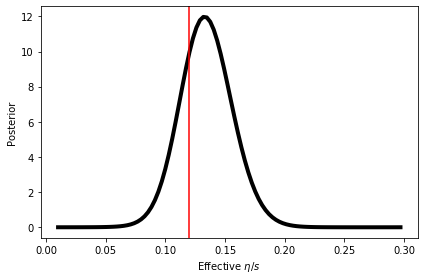

In [9]:
###############################
# Plotting marginal posterior #
###############################

# Posterior vs param_1
plt.figure()
plt.xscale('linear')
plt.yscale('linear')
#plt.xlim(0,2)
#plt.ylim(1e-5,1e2)
plt.xlabel(param1_label)
plt.ylabel(r'Posterior')

# The marginal posterior for a parameter is obtained by integrating over a subset of other model parameters

# Compute the posterior for a range of values of the parameter "param_1"
param1_range=np.linspace(param1_min, param1_max, 30)

posterior_list = [ scipy.integrate.quad(lambda param2_val: posterior({param1_name:param1_val, param2_name:param2_val},data_d),param2_min,param2_max)[0] for param1_val in param1_range ]

plt.plot(param1_range, posterior_list, "-", color='black', lw=4)

plt.axvline(x=param1_truth,color='red')

plt.tight_layout()
plt.show()


# Posterior vs param_2
plt.figure()
plt.xscale('linear')
plt.yscale('linear')
plt.xlabel(param2_label)
plt.ylabel(r'Posterior')

# The marginal posterior for a parameter is obtained by integrating over a subset of other model parameters

# Compute the posterior for a range of values of the parameter "param_2"
param1_range=np.linspace(param2_min, param1_max, 30)

posterior_list = [ scipy.integrate.quad(lambda param1_val: posterior({param1_name:param1_val, param2_name:param2_val},data_d),param1_min,param1_max)[0] for param2_val in param2_range ]

plt.plot(param2_range, posterior_list, "-", color='black', lw=4)

plt.axvline(x=param2_truth,color='red')

plt.tight_layout()
plt.show()